# $ Classification Exercises $

### imports

In [177]:
def map_setosa_knn(X_train, y_train, knn, fig_x=12.0, fig_y=5.0):
    plt.rcParams["figure.figsize"] = [fig_x, fig_y]
    plt.rcParams["figure.autolayout"] = True

    n_neighbors = knn.get_params()['n_neighbors']
    weights = knn.get_params()['weights']

    iris = datasets.load_iris()
    X = np.array(X_train[['sepal_length', 'sepal_width']])
    y = y_train.map({'setosa':0, 'versicolor':1, 'virginica':2})
    h = .02

    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ['c', 'darkorange', 'darkblue']

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()

    plt.contourf(xx, yy, Z, cmap=cmap_light)

    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
    palette=cmap_bold, alpha=1.0, edgecolor="black")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title("3-Class classification (k = %i, '%s')"
    % (n_neighbors, weights))

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

    plt.show()import pandas as pd
import numpy as np
import env
from pydataset import data
import acquire
import prepare
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
# help with missing value by replacing blank with: median, mode, average, calculate using other column
from sklearn.impute import SimpleImputer

# 4.  Create a pandas dataframe, df_iris, from this data.

In [ ]:
# use pydataset to import iris data and create data frame
df = data('iris')

# show top 3 rows of iris data
df.head(3)


In [ ]:
# use attribute shape of dataframe to obtain number of rows and columns
df.shape

In [ ]:
# use attribute columns to obtain column names
df.columns

In [ ]:
# Return a nice list of columns if I want to grab and use them later.

df.columns.to_list()


In [ ]:
# use attribute dtypes to see data types of columns
df.dtypes

In [ ]:
# Return data types plus.

df.info()

In [ ]:
# use describe method to see useful statistics of data transpose
df.describe().T

# 5. Read the data from this google sheet into a dataframe, df_google.

In [ ]:
# save url to variable
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
# replace edit with export and save to variable
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
# read url created csv and create data frame
google_df = pd.read_csv(csv_export_url)

# show top 3 rows fo data frame
google_df.head(3)

In [ ]:
# use attribute shape of dataframe to obtain number of rows and columns
google_df.shape

In [ ]:
# use attribute columns to obtain column names in a list
google_df.columns.to_list()

In [ ]:
# use method .info() to see more information such as nulls
google_df.info()

In [ ]:
# use attribute dtypes to see data types of columns
google_df.dtypes

In [ ]:
# use describe method to see useful statistics of numeric variables
google_df.describe().T

In [ ]:
# use nunique method to print how many unique values are in categorical variables
google_df.select_dtypes('object').nunique()

In [ ]:
# I could get a count of unique values for each variable with an object data type.

for col in google_df.columns:
#     print(col)
    if google_df[col].dtypes == 'object':
        print(f'{col} has {google_df[col].nunique()} unique values.')

In [ ]:
google_df.Survived.value_counts(dropna=False)


In [ ]:
google_df.Pclass.value_counts(dropna=False)

In [ ]:
google_df.Sex.value_counts(dropna=False)


In [ ]:
google_df.Embarked.value_counts(dropna=False)

# 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [ ]:
# create data frame from excel file
df_excel = pd.read_excel('df_excel.xlsx')
df_excel_sample = pd.read_excel('df_excel.xlsx').head(100)

In [ ]:
# look at info
df_excel.info()

In [ ]:
# shape of df
df_excel_sample.shape

In [ ]:
# return the number of rows only using attribute
df_excel.shape[0]

In [ ]:
# print the first 5 column names using attribute [:5] (inclusive) of data frame
df_excel_sample.columns[:5]

In [ ]:
# returns a list: print of column names that have a data type of object
df_excel_sample.select_dtypes(object).columns.tolist()

In [ ]:
# returns an array : print of column names that have a data type of object
df_excel_sample.select_dtypes(object).columns

In [ ]:
# use select dtypes and see the head
df_excel.select_dtypes(include='object').head()

In [ ]:
# Not seperating encoded columns compute the range of numeric variables in data frame
df_excel_sample.select_dtypes('float64').max()-df_excel_sample.select_dtypes('float64').min()

In [ ]:
# Some of these numeric columms are more like encoded categorical variables.

df_excel.head(3)


In [ ]:
# The two columns I want to know the range on are 'Age' and 'Fare'
# I can select just the true numeric variables to declutter my results.

titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats

# acquire.py TEST Functions



In [ ]:
telco_df = acquire.get_telco_data()
telco_df.head()

In [ ]:
iris_df = acquire.get_iris_data()
iris_df.head()

In [ ]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

# acquire.py code in vsc file
```python

import pandas as pd

import env


def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def new_titanic_data(): 
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT * FROM passengers
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('titanic_db'))
    
    return df  

def get_titanic_data():
    filename = "titanic.csv"

    # if file is available locally, read it
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    
    # if file not available locally, acquire data from SQL database
    # and write it as csv locally for future use
    else:
        df = new_titanic_data()
        
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df  

def new_iris_data(): 
    '''
    This function reads the iris data from the Codeup db into a df.
    '''
    sql_query = """
                SELECT * FROM measurements JOIN species USING(species_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    
    return df   


def get_iris_data():
    filename = "iris.csv"

    # if file is available locally, read it
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    
    # if file not available locally, acquire data from SQL database
    # and write it as csv locally for future use
    else:
        df = get_iris_data()
        
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename)

        # Return the dataframe to the calling code
        return df 


def new_telco_data():
    '''
    This function reads the telco data from the Codeup db into a df.
    '''
    sql_query = """
                select * from customers
                join contract_types using (contract_type_id)
                join internet_service_types using (internet_service_type_id)
                join payment_types using (payment_type_id)
                """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query, get_connection('telco_churn'))
    
    return df
def get_telco_data():
    '''
    This function reads in telco data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('telco.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('telco.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_telco_data()
        
        # Cache data
        df.to_csv('telco.csv')
        
    return df

```

# $ Data Preparation $

# Using the Iris Data:

### 1. Use the function defined in acquire.py to load the iris data.

In [ ]:
# call on function to obtain iris data
iris_df =acquire.get_iris_data()
iris_df.sample(5)

In [ ]:
# use shape attribure to see number of rows and columns
iris_df.shape

### 2.  Drop the species_id and measurement_id columns.

In [ ]:
# use method to drop columns
iris_df.drop(columns = ['species_id','measurement_id'], inplace = True)

In [ ]:
# use shape to verify two columns where drop
iris_df.shape

### 3. Rename the species_name column to just species.

In [ ]:
# use method .rename to rename columns
iris_df.rename(columns={"species_name": "species"}, inplace = True)

In [ ]:
# use attribute columns and method to_list to double check rename
iris_df.columns.to_list()

### 4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [ ]:
# check how many unique values are in species column
iris_df.species.value_counts()

In [ ]:
# create dummy data frame that encodes the 3 unique species name
dummy_iris_df = pd.get_dummies(iris_df['species'], dummy_na = False)

In [ ]:
dummy_iris_df

In [ ]:
# concatenate the dummy_df with original data frame
new_iris_df = pd.concat([iris_df, dummy_iris_df], axis = 1)
new_iris_df.sample(5)

### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    ''' This function takes in iris dataframe will drop columns ['species_id,'measurement_id']
    rename 'species name' to 'species'.  
    Creates a dummy data drop_first(false) frame to encode the categorical values of species and concatanate 
    back into the original dataframe
    '''
    # use method to drop columns
    iris_df.drop(columns = ['species_id','measurement_id'], inplace = True)
    
    # use method .rename to rename columns
    iris_df.rename(columns={"species_name": "species"}, inplace = True)
    
    # create dummy data frame that encodes the 3 unique species name
    dummy_iris_df = pd.get_dummies(iris_df['species'], dummy_na = False)
    
    # concatenate the dummy_df with original data frame
    new_iris_df = pd.concat([iris_df, dummy_iris_df], axis = 1)
    
    return new_iris_df
    

In [ ]:
# check to see if function was sucessful by restart kernel and run imports and iris_df =acquire.get_iris_data() and def prep_iris(df):
clean_iris_df = prep_iris(iris_df)

In [ ]:
clean_iris_df.head()

# Using the Titanic dataset:

### 1. Use the function defined in acquire.py to load the Titanic data.

In [ ]:
# call on function to obtain titanic data
titanic_df = acquire.get_titanic_data()
titanic_df.head()

In [ ]:
titanic_df.info()

### 2. Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
# Deciding which columns to be droped: 'Unnamed: 0','pclass',
titanic_df.columns.to_list()


In [ ]:
# dropped columns 'embarked', 'pclass', 'passenger_id', 'deck
# you can drop columns if they have nulls or impute them
titanic_df.drop(columns = ['embarked', 'pclass', 'passenger_id', 'deck'], inplace = True)

In [ ]:
titanic_df.shape

### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=[False])

In [ ]:
df = pd.concat([titanic_df,dummy_df], axis=1)
df

### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic(df):
    '''
    This function takes in dataframe and
    drops columns embarked', 'pclass', 'passenger_id', 'deck' and
    encodes 'sex', 'class', 'embark_town' with drop_first false and
    concatenates encoded df with original df
    '''
    
    # dropped columns 'embarked', 'pclass', 'passenger_id', 'deck
    titanic_df.drop(columns = ['embarked', 'pclass', 'passenger_id', 'deck'], inplace = True)
    
    # encode titanic dataframe for sex', 'class', 'embark_town
    dummy_df = pd.get_dummies(titanic_df[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=[False])
    
    # concatenate dummy data frame to original dataframe
    df = pd.concat([titanic_df,dummy_df], axis=1)

    return df

    

In [ ]:
# save function to variable to test
sample_df = prep_titanic(titanic_df)

In [ ]:
# test to see for correct output
sample_df.head(10)

# Using the Telco dataset

### 1. Use the function defined in acquire.py to load the Telco data.

In [ ]:
telco_df = acquire.get_telco_data()

In [ ]:
telco_df.head()

In [ ]:
# use crosstab


In [ ]:
telco_df.contract_type.value_counts()

In [ ]:
telco_df.payment_type.value_counts()

In [ ]:
telco_df.multiple_lines.value_counts()

In [ ]:
telco_df.phone_service.value_counts()

In [ ]:
# Creating a list of our numeric columns
numcols = [col for col in telco_df.columns if telco_df[col].dtype != 'O']
numcols

In [ ]:
# Creating a list of our categorical columns
catcols = [col for col in telco_df.columns if telco_df[col].dtype == 'O']
catcols

In [ ]:
telco_df.info()

### 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.


In [ ]:
telco_df.columns


In [ ]:
# drop unnecessary : payment_type_id', 'internet_service_type_id', 'contract_type_id' 
telco_df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id' ])

### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.


In [ ]:
telco_df.tech_support.value_counts()

In [ ]:
# encode categorical drop_first set to False 'senior_citizen'gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', 'tech_support','streaming_tv','streaming_movies','paperless_billing', 'total_charges', 'churn','contract_type','internet_service_type','payment_type'
dummy_df = pd.get_dummies(telco_df[['senior_citizen', 
                                    'gender','partner',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing', 
                                    'total_charges', 
                                    'churn',
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type']], dummy_na=False, drop_first=[False])



In [ ]:
# Concatenate dummy_df to original data frame
df = pd.concat([telco_df, dummy_df], axis=1)
df


### 4 Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco(df):
    '''
    This function takes in dataframe and 
    drops columns:'payment_type_id', 'internet_service_type_id', 'contract_type_id' 
    encode categorical columns, drop_first set to False: 'senior_citizen'gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', 'tech_support','streaming_tv','streaming_movies','paperless_billing', 'total_charges', 'churn','contract_type','internet_service_type','payment_type'
    Concatenate dummy_df to original data frame
    '''
    
    # drop unnecessary : payment_type_id', 'internet_service_type_id', 'contract_type_id' 
    telco_df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id' ])
    
    # encode categorical drop_first set to False 'senior_citizen'gender','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection', 'tech_support','streaming_tv','streaming_movies','paperless_billing', 'total_charges', 'churn','contract_type','internet_service_type','payment_type'
    dummy_df = pd.get_dummies(telco_df[['senior_citizen', 
                                    'gender','partner',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing', 
                                    'total_charges', 
                                    'churn',
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type']], dummy_na=False, drop_first=[False])
    
    # Concatenate dummy_df to original data frame
    df = pd.concat([telco_df, dummy_df], axis=1)
    
    return df
    

In [ ]:
# save function to variable to test
sample_df = prep_telco(telco_df)

In [ ]:
# check for correct output
sample_df.head()

# Split your data

### 1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.


In [ ]:
def train_validate_test(df, target):
    
    train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    train, validate = train_test_split(train, test_size=.25, random_state=123, stratify=train[target])
    
    return train, validate, test

In [ ]:
target= 'species'

In [ ]:
train_validate_test(iris_df, 'species')

### 2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.


In [ ]:
target = 'species'

In [ ]:
train_validate_test(iris_df, 'species')

### 3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.


In [ ]:
target = 'survived'

In [ ]:
train_titanic, validate_titanic, test_titanic =train_validate_test(titanic_df, target)

### 4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.


In [ ]:
target = 'churn'

In [ ]:
train_telco, validate_telco, test_telco = train_validate_test(telco_df, target)

In [ ]:
train_telco

# $ Exploratory  Analysis$

# Part 1
Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

In [ ]:
# to see all columns in wide datasets
# pd.set_option('display.max_columns', None)

# to see all rows in data set
# pd.set_option('display.max_rows',None)

### 1. Acquire, prepare & split your data.

In [3]:
# acquire data using 
df = acquire.get_iris_data()


In [4]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [5]:
# check for null values
df.isna().sum()

species_id        0
measurement_id    0
sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species_name      0
dtype: int64

In [6]:
# prepare data
df = prepare.prep_iris(df)

In [7]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


In [8]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
count,150.000000,150.000000,150.000000,150.000000,150,150.000000,150.000000,150.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,setosa,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN
mean,5.843333,3.057333,3.758000,1.199333,NaN,0.333333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,NaN,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,NaN,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,NaN,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,NaN,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,NaN,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   setosa        150 non-null    uint8  
 6   versicolor    150 non-null    uint8  
 7   virginica     150 non-null    uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 7.5+ KB


In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
setosa            uint8
versicolor        uint8
virginica         uint8
dtype: object

In [11]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
setosa           2
versicolor       2
virginica        2
dtype: int64

In [12]:
# split data
train, validate, test = prepare.split_iris_data(df)
train.shape,validate.shape, test.shape

((84, 8), (36, 8), (30, 8))

### 2. Univariate

#### * For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
 5   setosa        84 non-null     uint8  
 6   versicolor    84 non-null     uint8  
 7   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.2+ KB


In [14]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [16]:
num_vars = ['sepal_length','sepal_width','petal_length','petal_width']
cat_vars = ['species']

sepal_length
count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


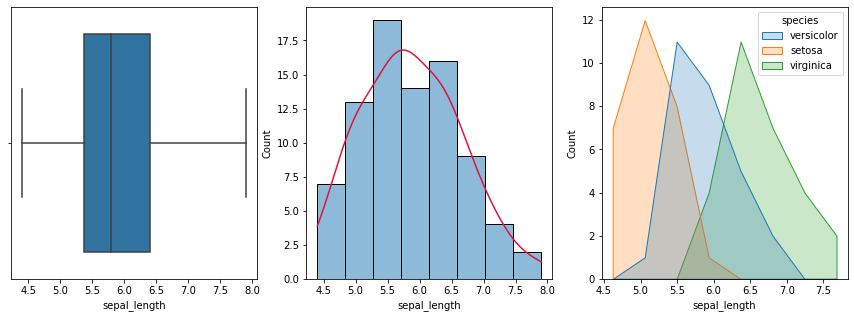

Sepal length seems to have normal distribution, with a mean of 5.8. With sepal length Setosa and Virginia are more distinguished
sepal_width
count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


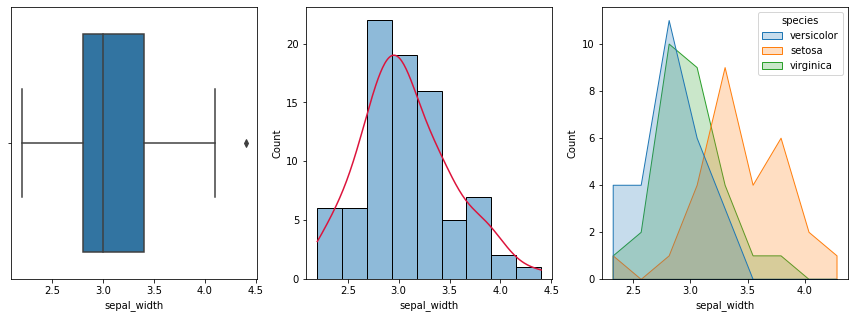

Sepal width has a mean of 3.07 and is slightly skewed right. It is difficult to distinguish the species using sepal width, there is too much over lap.
petal_length
count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


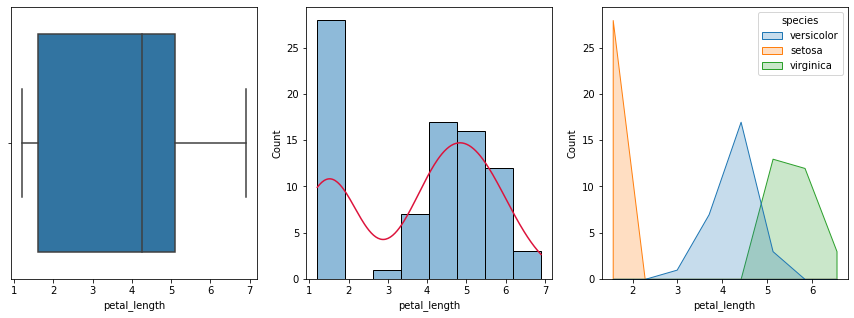

Petal length mean is 3.77. Its distribution is not normal. Setosa and Virginia have no overlap in petal length and can be distinguished.
petal_width
count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


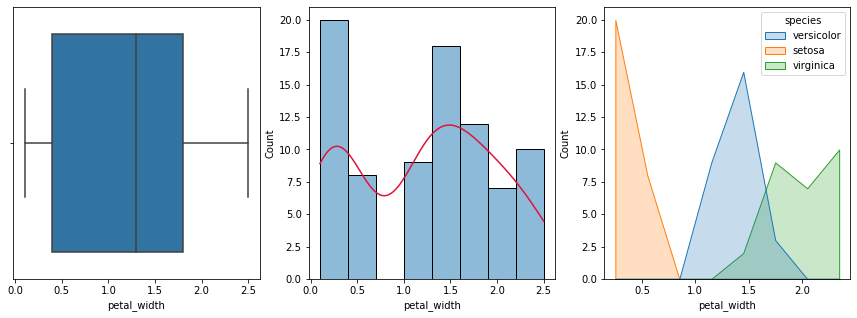

Petal width mean is 1.2, does not have normal distribution. Setosa and Virginia have no overlap and can be distinguished using petal width


In [22]:
# create describe, boxplot, histplot
summary=[]

for col in num_vars:
    fig, ax1 = plt.subplots(1,3, figsize=(15,5)) 
    print(col)
    print(train[col].describe())
    sns.boxplot(x=col, data=train,ax=ax1[0],)
    
    graph=sns.histplot(x=col, data=train,ax=ax1[1],kde=True)
    graph.lines[0].set_color('crimson')
    
    sns.histplot(x=col, data= train,ax=ax1[2],hue='species', element='poly')
    
    plt.show()
    takeaways = input()
    
    summary.append(takeaways)
  

In [23]:
# print in data frame key take aways
key_takeaways = pd.DataFrame(summary)
key_takeaways


,0
0,"Sepal length seems to have normal distribution, with a mean of 5.8. With sepal length ..."
1,Sepal width has a mean of 3.07 and is slightly skewed right. It is difficult to distin...
2,Petal length mean is 3.77. Its distribution is not normal. Setosa and Virginia have no...
3,"Petal width mean is 1.2, does not have normal distribution. Setosa and Virginia have n..."


#### * For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [19]:
# frequency table
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

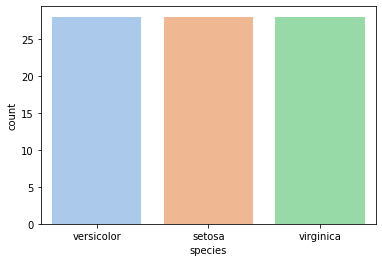

In [20]:
# bar plot
sns.countplot(x='species', data=train, palette='pastel')

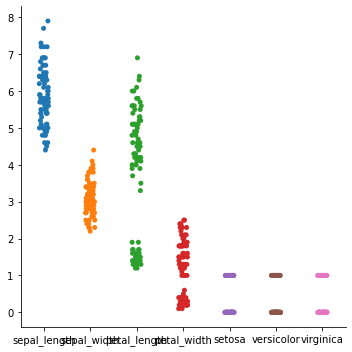

In [21]:
sns.catplot(data=train)

#### * Document takeaways & any actions.

<span style='color:green'> Sepal length seems to have normal distribution, with a mean of 5.8. With sepal length Setosa and Virginia are more distinguished

<span style='color:green'>    Sepal width has a mean of 3.07 and is slightly skewed right. It is difficult to distinguish the species using sepal width, there is too much over lap.

 <span style='color:green'>   Petal length mean is 3.77. Its distribution is not normal. Setosa and Virginia have no overlap in petal length and can be distinguished.

<span style='color:green'>    Petal width mean is 1.2, does not have normal distribution. Setosa and Virginia have no overlap and can be distinguished using petal width </span>

<span style='color:green'>Train data is evenly distributed.
Sepal length and petal length are larger and have more spread
There is some seperation in the data of pedal length and pedal width

### 3. Bivariate Stats


#### * Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [1]:
summary = []
for col in num_vars:
    plt.title(f'{col} mean')
    sns.barplot(x='species', y = col, data = train,ci=False,saturation=.9, palette="PuRd_r")
    col_mean= train[col].mean()
    plt.axhline(col_mean, label = f'{col} mean',color='maroon')
    plt.legend()
    plt.show()
    
    takeaways = input()
    
    summary.append(takeaways)

NameError: name 'num_vars' is not defined

In [28]:
# print in data frame key take aways
takeaways = pd.DataFrame(summary)
takeaways


,0
0,In regards to sepal_length Virginia has a higher mean.
1,In regards to sepal width Setosa is above the mean.
2,In regards to petal length Setosa is significantly below the mean. Virginia is above t...
3,In regards to petal width Setosa is below the mean. Virginia is significantly above th...


### Documentation

In regards to sepal_length Virginia has a higher mean.
In regards to sepal width Setosa is above the mean.
In regards to petal length Setosa is significantly below the mean. Virginia is above t...
In regards to petal width Setosa is below the mean. Virginia is significantly above th...


setosa is distinct from the other.
Virginica has the highest mean sepal length
Setosa has the highest sepal width
virginica has the largets petal length
virginica has the largest petal width


#### * For each measurement type, compute the descriptive statistics for each species.

In [29]:
# Virginica descriptive statistics
virginica_describe_sl = pd.DataFrame(train[train.species == 'virginica'].sepal_length.describe())
virginica_describe_sw = pd.DataFrame(train[train.species == 'virginica'].sepal_width.describe())
virginica_describe_pl = pd.DataFrame(train[train.species == 'virginica'].petal_length.describe())
virginica_describe_pw = pd.DataFrame(train[train.species == 'virginica'].petal_width.describe())

virginica_describe = pd.concat([virginica_describe_sl, virginica_describe_sw], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pl], axis=1)
virginica_describe = pd.concat([virginica_describe, virginica_describe_pw], axis=1)
virginica_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [30]:
# Setosa descriptive statistics
setosa_describe_sl = pd.DataFrame(train[train.species == 'setosa'].sepal_length.describe())
setosa_describe_sw = pd.DataFrame(train[train.species == 'setosa'].sepal_width.describe())
setosa_describe_pl = pd.DataFrame(train[train.species == 'setosa'].petal_length.describe())
setosa_describe_pw = pd.DataFrame(train[train.species == 'setosa'].petal_width.describe())

setosa_describe = pd.concat([setosa_describe_sl, setosa_describe_sw], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pl], axis=1)
setosa_describe = pd.concat([setosa_describe, setosa_describe_pw], axis=1)
setosa_describe

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [31]:
# Versicolor descriptive statistics
versicolor_describe_sl = pd.DataFrame(train[train.species == 'versicolor'].sepal_length.describe())
versicolor_describe_sw = pd.DataFrame(train[train.species == 'versicolor'].sepal_width.describe())
versicolor_describe_pl = pd.DataFrame(train[train.species == 'versicolor'].petal_length.describe())
versicolor_describe_pw = pd.DataFrame(train[train.species == 'versicolor'].petal_width.describe())

versicolor_describe = pd.concat([versicolor_describe_sl, versicolor_describe_sw], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pl], axis=1)
versicolor_describe = pd.concat([versicolor_describe, versicolor_describe_pw], axis=1)
versicolor_describe


,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


#### * For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

variables:
* mean petal width: numeric, continuous

* species(virginica & versicolor): categorical, discrete

Test: Two independent samples, Mann-Whitney's test

$H_0$:The mean petal width of virginica == The mean petal width of versicolor

$H_a$:The mean petal width of virginica != The mean petal width of versicolor

In [32]:
# alpha significance level
alpha = 0.05

In [33]:
train.petal_width[train.species=='versicolor']

79    1.0
95    1.2
91    1.4
82    1.2
52    1.5
97    1.3
70    1.8
51    1.5
57    1.0
53    1.3
69    1.1
87    1.3
67    1.0
92    1.2
96    1.3
89    1.3
83    1.6
84    1.5
74    1.3
61    1.5
81    1.0
58    1.3
54    1.5
94    1.3
88    1.3
85    1.6
55    1.3
73    1.2
Name: petal_width, dtype: float64

In [34]:
virginica_petal_width = train.petal_width[train.species=='virginica']

versicolor_petal_width = train.petal_width[train.species=='versicolor']


In [35]:
# run manwhitneyu test on petal width  virginica vs petal width versicolor, two-sided is similar to a two-tail test
stat,pval=stats.mannwhitneyu(virginica_petal_width,versicolor_petal_width , alternative='two-sided')
stat, pval

(767.0, 6.47119166980993e-10)

In [36]:
if pval < alpha:
    print("We reject $H_{0}$")
else:
    print("We fail to reject $H_{0}$")

We reject $H_{0}$


In [37]:
def mannwhitneyutest(df,variables):
    alpha = 0.05
    for col in variables:
        print (col)
        print('__________')
        virginica = train[col][train.species=='virginica']
        versicolor = train[col][train.species=='versicolor']
        
        stat,pval=stats.mannwhitneyu(virginica,versicolor, alternative='two-sided')
        print(stat, pval)
        
        if pval < alpha:
            print("We reject $H_{0}$")
        else:
            print("We fail to reject $H_{0}$")
        print('______________')
        print('______________')
        
    

In [38]:
mannwhitneyutest(train,num_vars )

sepal_length
__________
676.5 3.082029196534108e-06
We reject $H_{0}$
______________
______________
sepal_width
__________
510.0 0.05257259139845694
We fail to reject $H_{0}$
______________
______________
petal_length
__________
776.5 2.9479835715150625e-10
We reject $H_{0}$
______________
______________
petal_width
__________
767.0 6.47119166980993e-10
We reject $H_{0}$
______________
______________


#### * Document takeaways & any actions.

We fail to reject $H_0$.The mean petal width of virginica has a significant differance from the mean petal width of versicolor.

When looking at the measurement type differences between virginica and versicolor. The following measurements showed significant difference in the means between virginica and versicolor 'sepal_length','petal_length','petal_width'. There was no significant difference in the sepal width between virginica and versicolor.

* petal_length and petal_width show the most seperation between species.
* Could petal and sepal area be useful features?
* viginica iris have the largest petals.
* setosa iris have the smallest petals.
* setosa seem to have wide & short sepals.

### 4. Multivariate Stats


#### * Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [40]:
# an example of feature engineering
train['sepal_area']=train.sepal_length*train.sepal_width
train['petal_area']=train.petal_length*train.petal_width


In [41]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica,sepal_area,petal_area
79,5.7,2.6,3.5,1.0,versicolor,0,1,0,14.82,3.50
36,5.5,3.5,1.3,0.2,setosa,1,0,0,19.25,0.26
133,6.3,2.8,5.1,1.5,virginica,0,0,1,17.64,7.65
95,5.7,3.0,4.2,1.2,versicolor,0,1,0,17.10,5.04
18,5.7,3.8,1.7,0.3,setosa,1,0,0,21.66,0.51


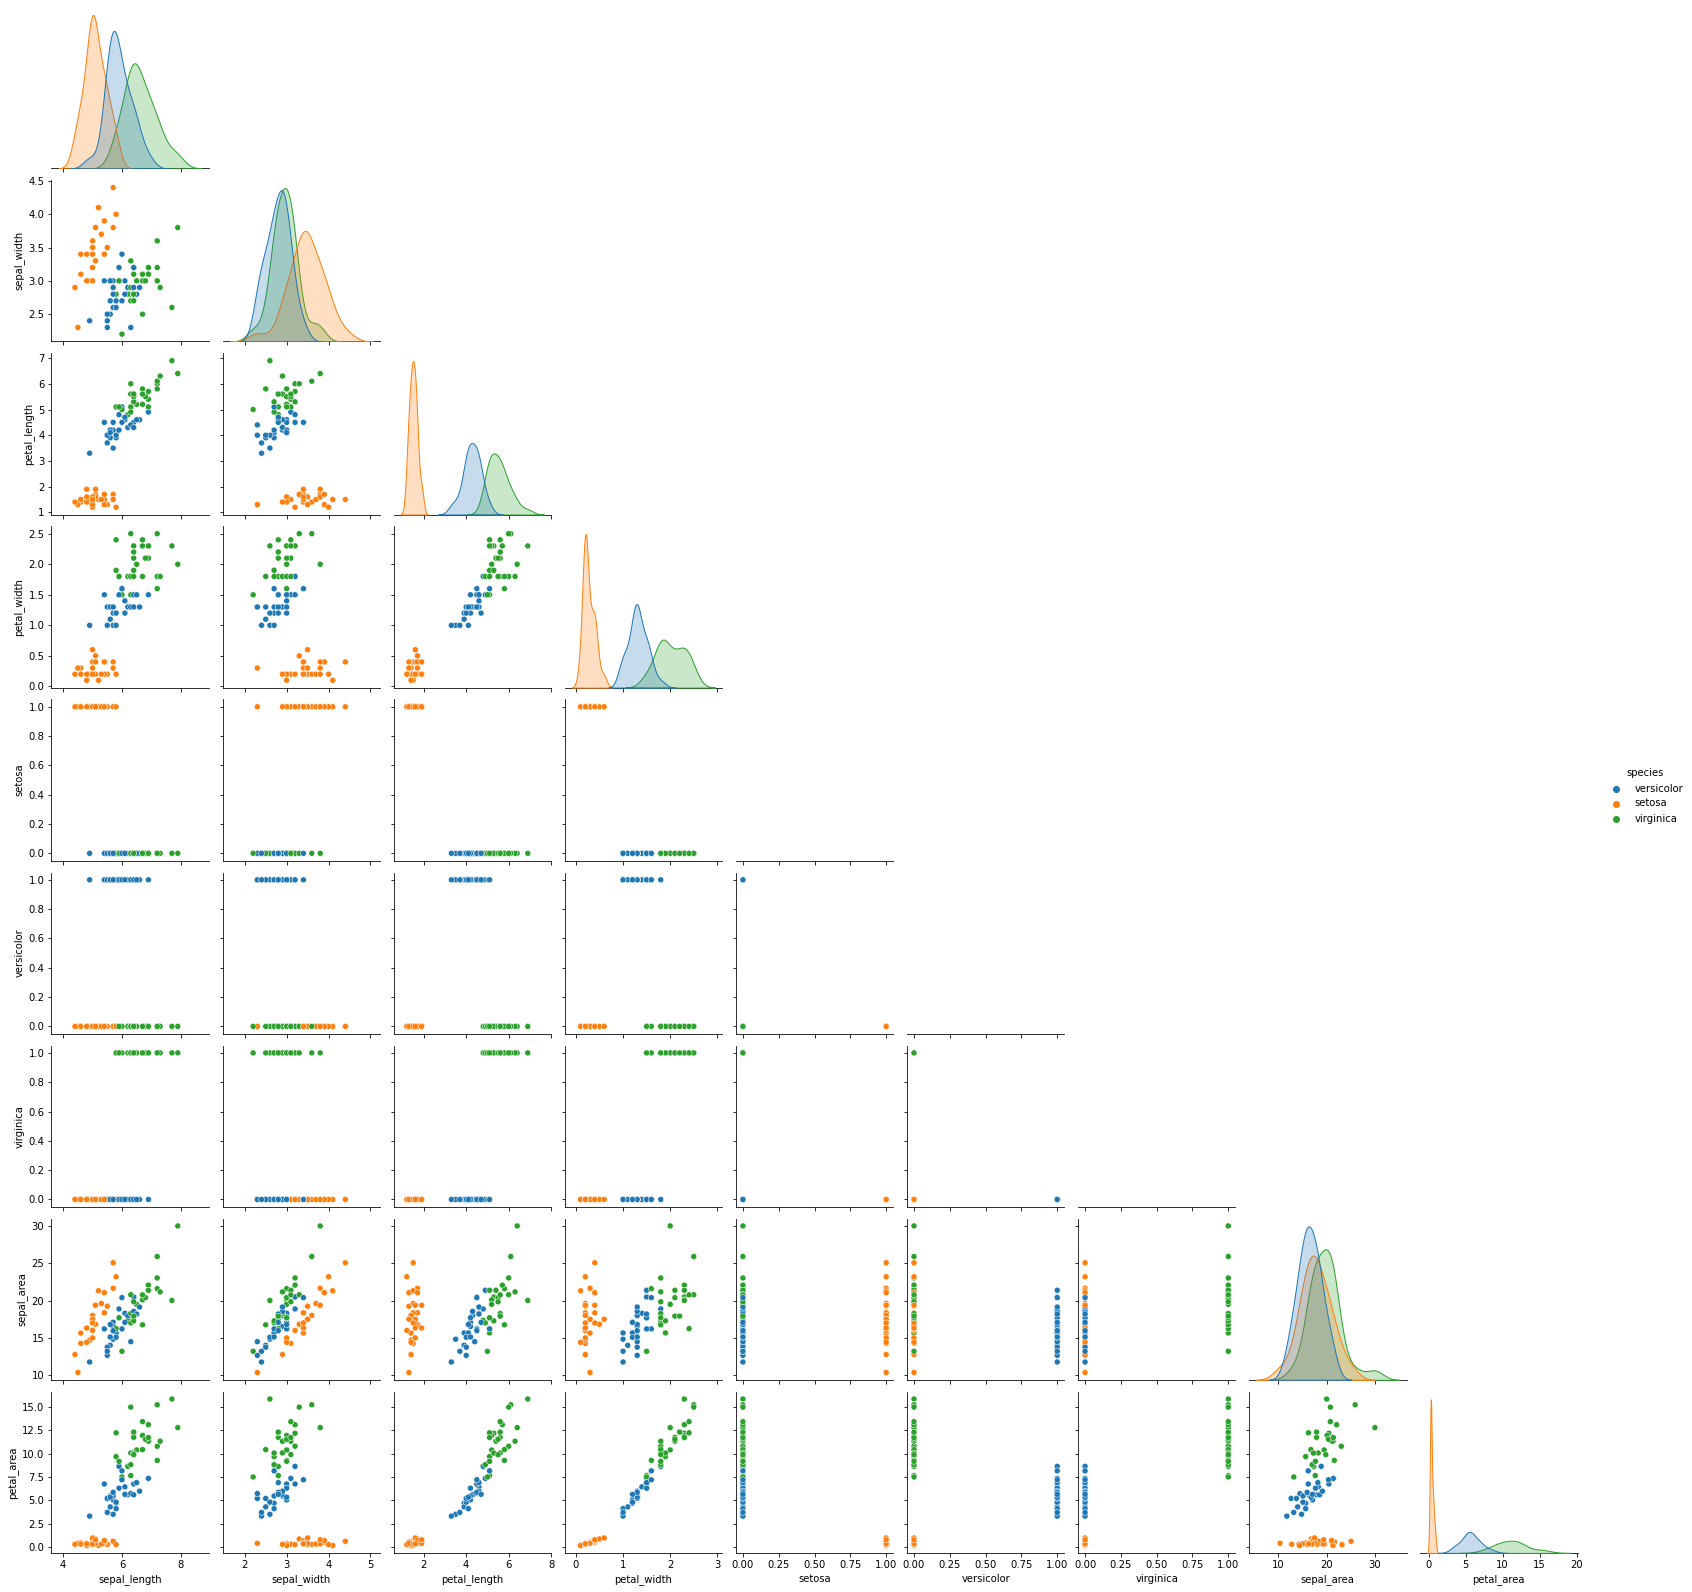

In [42]:
# pairplot for whole train dataframe

sns.pairplot(train, corner = True, hue='species')

WE can see that setosa is very distinct. virginica and versicolor have little distinction in most markers. There is some distinction in petal length and petal width between virginica and versicolor.

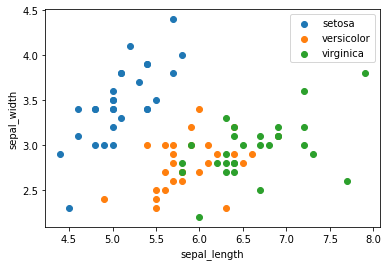

In [43]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
# test it with one plot
scatter_species(x,y)

* Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

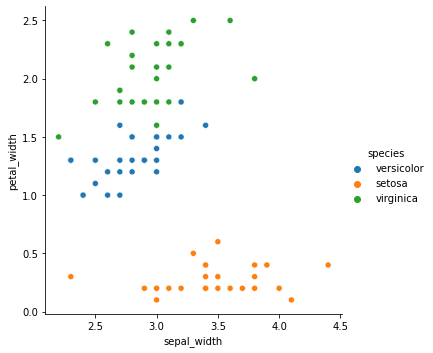

In [44]:
sns.relplot(data= train, x='sepal_width', y='petal_width', hue = 'species')

Setosa is distinguishable from virginica when looking at these two parameters petal_width and sepal_width

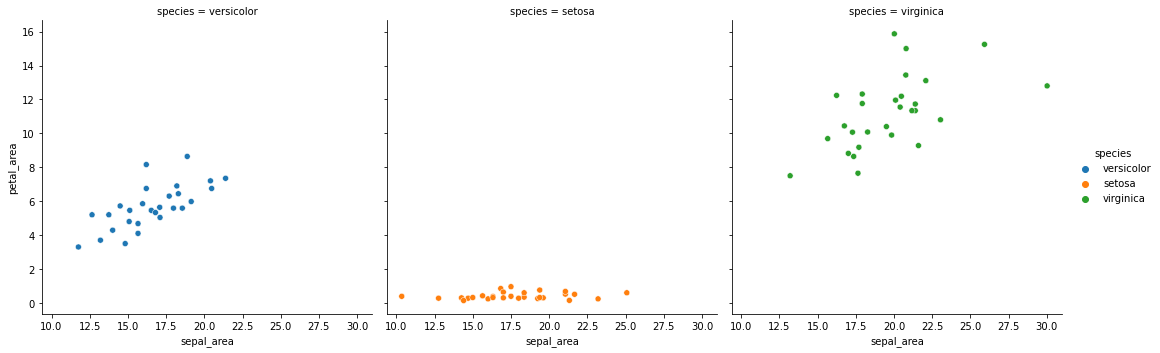

In [45]:
# col ='species' seperates each hue to its own scatterplot
sns.relplot(data= train, x='sepal_area', y='petal_area', hue = 'species',col='species')

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

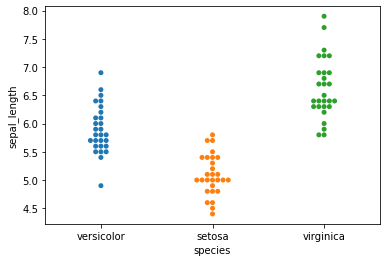

In [46]:
sns.swarmplot(data=train, x ='species', y ='sepal_length')

In [47]:
train_num_melt = train.melt(id_vars ='species')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 70.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categori

<AxesSubplot:xlabel='variable', ylabel='value'>

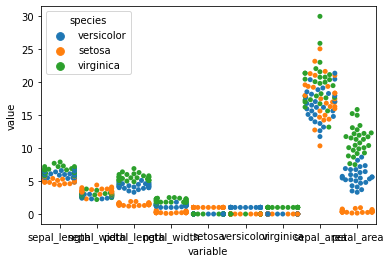

In [48]:
sns.swarmplot(data=train_num_melt, x ='variable', y ='value', hue = 'species')

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [49]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,-0.722317,0.024224,0.698093,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.623439,-0.442075,-0.181364,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,-0.928394,0.205008,0.723386,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,-0.877707,0.104650,0.773058,0.299920,0.982404
setosa,-0.722317,0.623439,-0.928394,-0.877707,1.000000,-0.500000,-0.500000,-0.052203,-0.816541
versicolor,0.024224,-0.442075,0.205008,0.104650,-0.500000,1.000000,-0.500000,-0.320752,-0.015033
virginica,0.698093,-0.181364,0.723386,0.773058,-0.500000,-0.500000,1.000000,0.372955,0.831575
sepal_area,0.619853,0.673554,0.271618,0.299920,-0.052203,-0.320752,0.372955,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,-0.816541,-0.015033,0.831575,0.373870,1.000000


<AxesSubplot:>

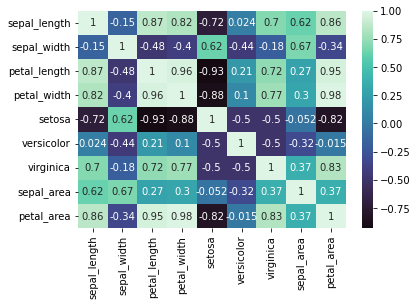

In [50]:
sns.heatmap(train.corr(),cmap='mako',center = 0, annot =True) 

* Document takeaways and any actions.


* sepal_length is useful, sepal_width not great but likely adds some value.
* petal_area is very useful, as we would expect given the previous plot of petal_width x petal length.
* sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton.

# Part II
Explore your titanic dataset more completely.

* Determine drivers of the target variable
* Determine if certain columns should be dropped
* Determine if it would be valuable to bin some numeric columns
* Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [111]:
# Acquire titanic data
titanic_df= acquire.get_titanic_data()
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [112]:
# check for null values
titanic_df.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

* 177 null values in the age column (maybe impute with average age)
* 688 null values in deck (drop this collumn)
* 2 null values in embark_town(maybe impute with most frequent or drop these two rows)

In [113]:
# check data type of columns
titanic_df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class            object
deck             object
embark_town      object
alone             int64
dtype: object

In [114]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [115]:
def prep_titanic1(df):
    '''
    This function takes in dataframe and
    drops columns embarked', 'pclass', 'passenger_id', 'deck' and
    encodes 'sex', 'class', 'embark_town' with drop_first false and
    concatenates encoded df with original df
    '''
    
    # dropped columns 'embarked', 'pclass', 'passenger_id', 'deck
    df.drop(columns = ['embarked', 'pclass', 'passenger_id', 'deck'], inplace = True)
    
    # encode titanic dataframe for sex', 'class', 'embark_town
    dummy_df = pd.get_dummies(df[['sex', 'class', 'embark_town']], dummy_na=False)
    
    # concatenate dummy data frame to original dataframe
    df = pd.concat([df,dummy_df], axis=1)

    return df

In [116]:
titanic_prep = prep_titanic1(titanic_df)

In [117]:
titanic_prep.columns

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'embark_town', 'alone', 'sex_female', 'sex_male', 'class_First',
       'class_Second', 'class_Third', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

Looking for columns to drop, 'sex','class','embark_town',

In [118]:
titanic_prep

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,male,22.0,1,0,7.2500,Third,Southampton,0,0,1,0,0,1,0,0,1
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,1,0,0,1,0,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1,1,0,0,0,1,0,0,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0,1,0,1,0,0,0,0,1
4,0,male,35.0,0,0,8.0500,Third,Southampton,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,Southampton,1,0,1,0,1,0,0,0,1
887,1,female,19.0,0,0,30.0000,First,Southampton,1,1,0,1,0,0,0,0,1
888,0,female,NaN,1,2,23.4500,Third,Southampton,0,1,0,0,0,1,0,0,1
889,1,male,26.0,0,0,30.0000,First,Cherbourg,1,0,1,1,0,0,1,0,0


In [119]:
# gettin titanic ready for processing
titanic_processing = titanic_prep.drop(columns = {'sex','class','embark_town'})

In [120]:
titanic_processing

,survived,age,sibsp,parch,fare,alone,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,1,1,0,1,0,0,0,0,1
888,0,NaN,1,2,23.4500,0,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30.0000,1,0,1,1,0,0,1,0,0


In [121]:
# getting data ready to split train/validate/test
titanic_train, titanic_validate, titanic_test = prepare.split_titanic_data(titanic_processing)

In [154]:
titanic_train, titanic_validate, titanic_test=prepare.impute_mean_age(titanic_train, titanic_validate, titanic_test)

In [155]:
# use shape method to find the size
titanic_train.shape, titanic_validate.shape, titanic_test.shape

((498, 14), (214, 14), (179, 14))

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>],
       [<AxesSubplot:title={'center':'fare'}>,
        <AxesSubplot:title={'center':'alone'}>,
        <AxesSubplot:title={'center':'sex_female'}>,
        <AxesSubplot:title={'center':'sex_male'}>],
       [<AxesSubplot:title={'center':'class_First'}>,
        <AxesSubplot:title={'center':'class_Second'}>,
        <AxesSubplot:title={'center':'class_Third'}>,
        <AxesSubplot:title={'center':'embark_town_Cherbourg'}>],
       [<AxesSubplot:title={'center':'embark_town_Queenstown'}>,
        <AxesSubplot:title={'center':'embark_town_Southampton'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

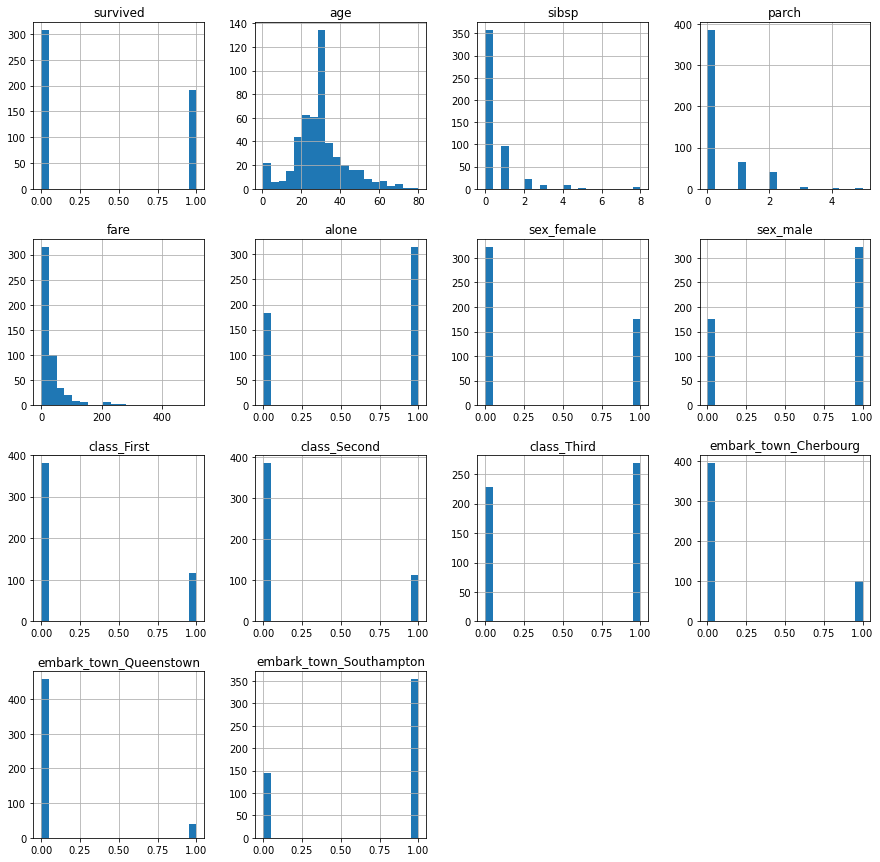

In [156]:
titanic_train.hist(bins=20, figsize = (15,15))

### Determine what can be binned.
Does fare have any relationship with survival? (could be bin)

Does age have any relationship with survival? ( could be bin)

Does Sibs have any relatiohsip with survival?

<AxesSubplot:>

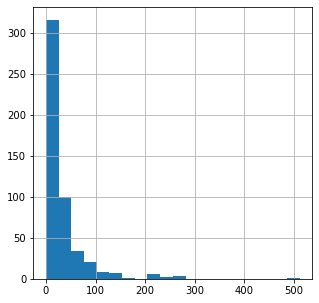

In [157]:
titanic_train.fare.hist(bins=20, figsize = (5,5))

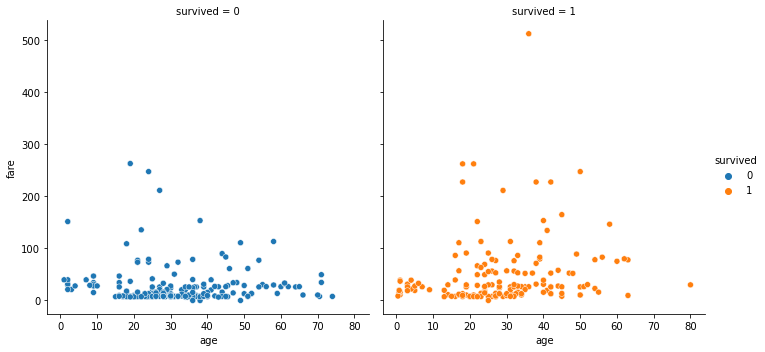

In [158]:
sns.relplot(data= train, x='age', y='fare', hue = 'survived',col ='survived')

There does not seem to some difference beween the age range of those who survived and those who did not.

In [159]:
num_vars = ['age','fare']
cat_vars = ['survived']

age
count    401.000000
mean      29.678105
std       14.570127
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


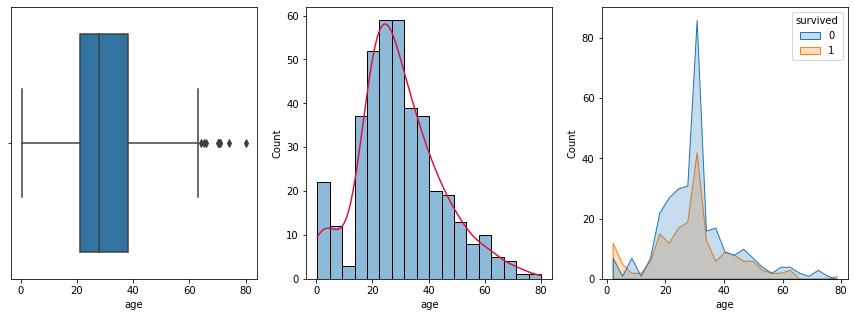

Age has a mean of 29 and is right skewed. What was the frequency count age of those who survived?
fare
count    498.000000
mean      31.130028
std       47.162206
min        0.000000
25%        7.895800
50%       13.500000
75%       30.392700
max      512.329200
Name: fare, dtype: float64


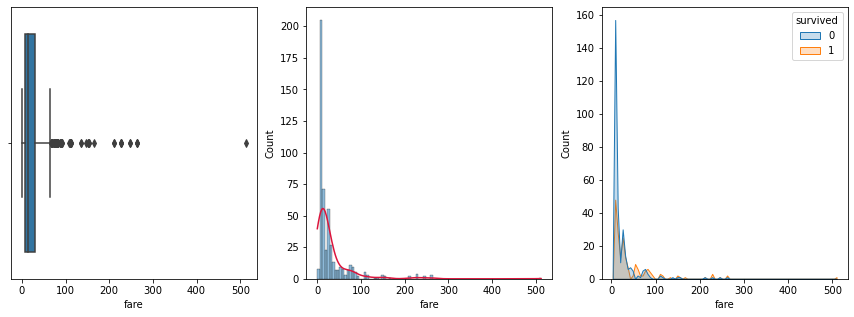

 'Fare has a mean of 31 but a large range(0,512). What was the mean fare of those who survived?


In [160]:

# create describe, boxplot, histplot
summary=[]

for col in num_vars:
    fig, ax1 = plt.subplots(1,3, figsize=(15,5)) 
    print(col)
    print(train[col].describe())
    sns.boxplot(x=col, data=train,ax=ax1[0],)
    
    graph=sns.histplot(x=col, data=train,ax=ax1[1],kde=True)
    graph.lines[0].set_color('crimson')
    
    sns.histplot(x=col, data= titanic_train,ax=ax1[2],hue='survived', element='poly')
    
    plt.show()
    takeaways = input()
    
    summary.append(takeaways)

In [161]:
summary


['Age has a mean of 29 and is right skewed. What was the frequency count age of those who survived?',
 " 'Fare has a mean of 31 but a large range(0,512). What was the mean fare of those who survived?"]

## notes
Age has a mean of 29 and is right skewed. What was the frequency count age of those who survived?',
Fare has a mean of 31 but a large range(0,512). What was the mean fare of those who survived?']


In [164]:
subset_survived =titanic_train[titanic_train.survived ==1]
subset_not_survived =titanic_train[titanic_train.survived ==0]


In [165]:
subset_survived.info(),subset_not_survived.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 165 to 744
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 191 non-null    int64  
 1   age                      191 non-null    float64
 2   sibsp                    191 non-null    int64  
 3   parch                    191 non-null    int64  
 4   fare                     191 non-null    float64
 5   alone                    191 non-null    int64  
 6   sex_female               191 non-null    uint8  
 7   sex_male                 191 non-null    uint8  
 8   class_First              191 non-null    uint8  
 9   class_Second             191 non-null    uint8  
 10  class_Third              191 non-null    uint8  
 11  embark_town_Cherbourg    191 non-null    uint8  
 12  embark_town_Queenstown   191 non-null    uint8  
 13  embark_town_Southampton  191 non-null    uint8  
dtypes: float64(2), int64(4),

(None, None)

In [167]:
subset_survived.age.describe(),subset_not_survived.age.describe()

(count    191.000000
 mean      28.732497
 std       13.825708
 min        0.420000
 25%       21.500000
 50%       29.678105
 75%       35.000000
 max       80.000000
 Name: age, dtype: float64,
 count    307.000000
 mean      30.266414
 std       12.566147
 min        1.000000
 25%       23.000000
 50%       29.678105
 75%       34.750000
 max       74.000000
 Name: age, dtype: float64)

# Hypothesis for Mean age VS Survived
Is there a difference in the mean age of those who survived and those who did not survived?

Variables:

    * survived (discrete)
    * age (continuous)
    
Test: Two sample, Two tail...scipy.stats.ttest_ind

$H_0$: Mean age of survived == mean age of not survived

$H_a$: Mean age of survived != mean age of not survived

Significance level alpha = 0.05

In [175]:
subset_survived.age.mean(), subset_survived.age.std(),subset_not_survived.age.mean(),subset_not_survived.age.std()

(28.732497029677116,
 13.825707706589903,
 30.266414419976087,
 12.566146516665182)

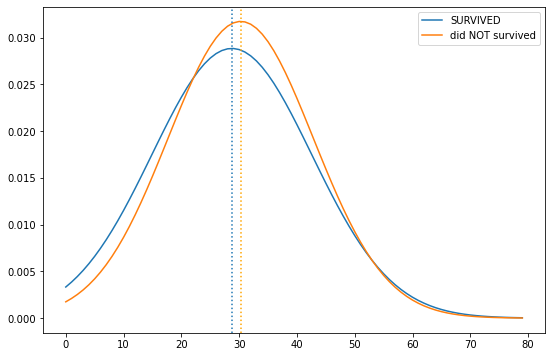

In [180]:
# Visualize two distribution:

x = np.arange(0,80)

y1 = stats.norm(subset_survived.age.mean(),subset_survived.age.std()).pdf(x)
y2 = stats.norm(subset_not_survived.age.mean(),subset_not_survived.age.std()).pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x, y1, label = 'SURVIVED')
plt.plot(x, y2, label = 'did NOT survived')
plt.axvline(subset_survived.age.mean(), ls = ':')
plt.axvline(subset_not_survived.age.mean(), ls = ':', color = 'orange')

plt.legend()

There seems to be a slight difference in means between those who survived and those who did not.

In [183]:
# use Levene test to see if equal variance is true or false
stat, pval = stats.levene(subset_survived.age, subset_not_survived.age)

if pval < 0.05:
    print('we can reject H0 ==> inequal variance')

In [185]:
print('levene',stat,pval)

levene 3.1236020498594597 0.07778086831712086


In [188]:
alpha = 0.05

t_stat, p_val = stats.ttest_ind(subset_survived.age, subset_not_survived.age, equal_var = True)
print(f' t-stat:{stat}')
print(f' p-value:{pval}')

if pval< 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

 t-stat:3.1236020498594597
 p-value:0.07778086831712086

Because the p-value (0.2031968124356967) is less than alpha value (0.05), we reject the null hypothesis


Summary: Null hythesis is rejected so there is a significan relationship beween age and survival.


Age is potentialy a driver in survival.

# Part III

Explore your telco data to discover drivers of churn

* Determine if certain columns should be dropped
* Determine if it would be valuable to bin some numeric columns
* Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

### Explore your telco data to discover drivers of churn

In [209]:
# to see all columns in wide datasets
pd.set_option('display.max_columns', None)

In [189]:
# acquire data using 
df = acquire.get_telco_data()


In [190]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [191]:
# prepare data
telco_df = prepare.prep_telco(df)

In [201]:
# check for null values
telco_df.isnull().sum()

customer_id                                0
gender                                     0
senior_citizen                             0
partner                                    0
dependents                                 0
tenure                                     0
phone_service                              0
multiple_lines                             0
online_security                            0
online_backup                              0
device_protection                          0
tech_support                               0
streaming_tv                               0
streaming_movies                           0
paperless_billing                          0
monthly_charges                            0
total_charges                             11
churn                                      0
contract_type                              0
internet_service_type                      0
payment_type                               0
gender_Female                              0
gender_Mal

11 null values in total charges, will impute mean in total charges column

### * Determine if certain columns should be dropped
dropped 'payment_type_id', 'internet_service_type_id', 'contract_type_id'

In [192]:
telco_df.dtypes

customer_id                                object
gender                                     object
senior_citizen                              int64
partner                                    object
dependents                                 object
tenure                                      int64
phone_service                              object
multiple_lines                             object
online_security                            object
online_backup                              object
device_protection                          object
tech_support                               object
streaming_tv                               object
streaming_movies                           object
paperless_billing                          object
monthly_charges                           float64
total_charges                             float64
churn                                      object
contract_type                              object
internet_service_type                      object


In [193]:
telco_df.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


### * Determine if it would be valuable to bin some numeric columns

In [194]:
# totalcharges could be bin since some of there is a big spread from min to max.
# monnthly char

telco_df.total_charges.describe(), telco_df.monthly_charges.describe()

(count    7032.000000
 mean     2283.300441
 std      2266.771362
 min        18.800000
 25%       401.450000
 50%      1397.475000
 75%      3794.737500
 max      8684.800000
 Name: total_charges, dtype: float64,
 count    7043.000000
 mean       64.761692
 std        30.090047
 min        18.250000
 25%        35.500000
 50%        70.350000
 75%        89.850000
 max       118.750000
 Name: monthly_charges, dtype: float64)

### * Determine if it would be valuable to combine multiple columns into one.
* we could combine certain services together such as: online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', to see if having more services has a relationship to the churn rate or tenure.
* we could also combine: 'gender' and 'dependents' so see if there is any relationship to churn rate or tenure
 

In [195]:
telco_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_Female', 'gender_Male', 'partner_No',
       'partner_Yes', 'dependents_No', 'dependents_Yes', 'phone_service_No',
       'phone_service_Yes', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No',
       'tech_support_No internet service', 'tech_support_Yes',
       

### What are your drivers of churn?

In [196]:
# split data
telco_train, validate, test = prepare.split_telco_data(telco_df)
telco_train.shape,validate.shape, test.shape

((3943, 64), (1691, 64), (1409, 64))

In [203]:
telco_train, validate, test = prepare.impute_mean_total_charges(telco_train, validate, test)

In [212]:
telco_train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,churn_No,churn_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5310,7503-MIOGA,Female,1,Yes,No,72,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,89.85,6697.35,No,Two year,DSL,Bank transfer (automatic),1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0
3790,5329-KRDTM,Male,1,Yes,No,72,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,77.35,5396.25,No,Two year,DSL,Credit card (automatic),0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0
4398,6199-IWKGC,Female,1,Yes,No,46,Yes,Yes,No,No,No,Yes,Yes,Yes,No,100.25,4753.85,No,One year,Fiber optic,Electronic check,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2635,3748-FVMZZ,Male,0,No,No,4,No,No phone service,No,No,No,Yes,No,Yes,Yes,40.05,162.45,No,Month-to-month,DSL,Electronic check,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0
2986,4280-DLSHD,Male,0,Yes,No,8,Yes,No,No,Yes,Yes,No,No,No,Yes,54.75,445.85,No,Month-to-month,DSL,Mailed check,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1


<AxesSubplot:xlabel='senior_citizen', ylabel='monthly_charges'>

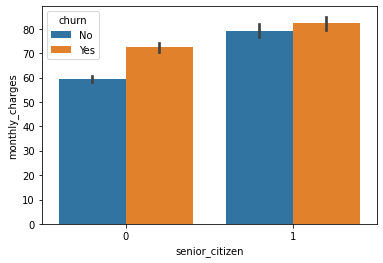

In [204]:
sns.barplot(data= telco_train, x='senior_citizen', y='monthly_charges', hue = 'churn')

### Do you find any surprises?

Suprising finding:  Senior citizens seem to pay  more monthly  than non senior citizens. This may be a reason why senior citizens are churning more.
Two questions:
    Do senior citizens churn more than non senior citizens?
    Do senior citizens pay more monthly charges than non senior citizens?

## Hypothesis for Senior status VS Churn status
Do customers who are consider seniors churn more than customers who are not seniors?
Variables:

    * seniors (discrete)
    * churn (discrete)
    
Test: chi^2

$H_0$: There is **no** relationship between a customers with senior status and churn.

$H_a$: There is a relationship between a customers senior status and churn.

In [222]:
# Chi-Square test to compare two categorical variables (Sex and Survival)

alpha = 0.05

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(telco_train.senior_citizen==1, telco_train.churn)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
    
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p

Reject the null hypothesis


6.9047796790463896e-18

Since we reject the null hypethesis there seems to be a relationship between senior citizens and churn.

Hypothesis for Senior citizens and Monthly charges
Do customers who are consider seniors pay more monthly charges than customers who are not seniors? 

Variables:
* seniors (discrete)
* month charges(continuous)

Test: two sample, one tail, scipy.stats.ttest_ind

$H_0$: The mean monthly charges for senior citizens <= to the mean monthly charges of non senior citizens.

$H_a$: The mean monthly charges for senior citizens <= to the mean monthly charges of non senior citizens.

In [227]:
total_charges_seniors = telco_train[telco_train.senior_citizen==1].total_charges
total_charges_nonseniors = telco_train[telco_train.senior_citizen==0].total_charges


In [229]:
# # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(total_charges_seniors, total_charges_nonseniors)

# high p-value suggests that the populations have equal variances

if pval < 0.05:
    print('we can reject H0 ==> inequal variance')
pval

0.07778086831712086

In [231]:
alpha = 0.05

t_stat, p_val = stats.ttest_ind(total_charges_seniors, total_charges_nonseniors, equal_var = True)
print(f' t-stat:{stat}')
print(f' p-value:{pval}')

if pval/2 < 0.05:
    print('we can reject H0 ')
    
print(f'''
Because the p-value ({p_val}) is less than alpha value ({alpha}), we reject the null hypothesis''')

 t-stat:3.1236020498594597
 p-value:0.07778086831712086
we can reject H0 

Because the p-value (7.978565837976711e-11) is less than alpha value (0.05), we reject the null hypothesis


Summary:
Since we reject the null hypothesis, there seems to be significant findings that senior citizens on average do pay more Monthly Charges than non senior citizens.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='gender', ylabel='monthly_charges'>

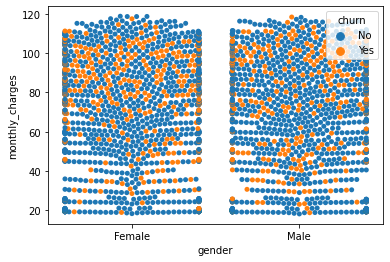

In [199]:
sns.swarmplot(data=telco_train, x ='gender', y ='monthly_charges', hue='churn')

Can not determine anything significant at this moment using swamplot, gender vs monthly_charges. Seem to be the same.

monthly_charges
count    3943.000000
mean       65.328937
std        30.261023
min        18.250000
25%        35.900000
50%        70.550000
75%        90.250000
max       118.750000
Name: monthly_charges, dtype: float64


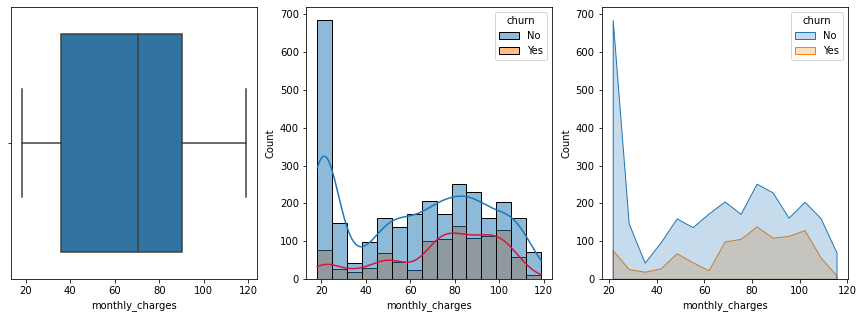

total_charges
count    3935.000000
mean     2314.994371
std      2282.059201
min        18.850000
25%       417.575000
50%      1411.350000
75%      3914.725000
max      8672.450000
Name: total_charges, dtype: float64


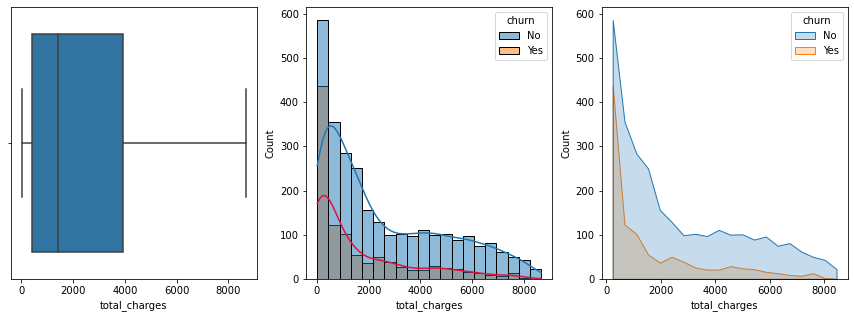

In [198]:
num_vars=['monthly_charges', 'total_charges']
# create describe, boxplot, histplot

for col in num_vars:
    fig, ax1 = plt.subplots(1,3, figsize=(15,5)) 
    print(col)
    print(telco_train[col].describe())
    sns.boxplot(x=col, data=telco_train,ax=ax1[0])
    
    graph=sns.histplot(x=col, data=telco_train,ax=ax1[1],kde=True, hue='churn')
    graph.lines[0].set_color('crimson')
    
    sns.histplot(x=col, data= telco_train,ax=ax1[2],hue='churn', element='poly')
    
    plt.show()

Senior citizens tend to have a slightly longer tenure than non senior citizens. 